In [30]:
!pip install tensorflow matplotlib roboflow

In [31]:
import os
from roboflow import Roboflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np


In [32]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4uPTPQR4io0oNVtkOdah")
project = rf.workspace("insignia-y6qez").project("recaptcha-ajhol")
version = project.version(2)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...


In [33]:
dataset_path = "recaptcha-2"
print("Folders in dataset:", os.listdir(dataset_path))

train_dir = os.path.join(dataset_path, "train")
valid_dir = os.path.join(dataset_path, "valid")
test_dir = os.path.join(dataset_path, "test")

# Check class folders
print("Classes in train:", os.listdir(train_dir))
print("Classes in valid:", os.listdir(valid_dir))
print("Classes in test:", os.listdir(test_dir))

Folders in dataset: ['README.dataset.txt', 'README.roboflow.txt', 'valid', 'train', 'test']
Classes in train: ['Traffic-Light', 'Motorcycle', 'Chimney', 'Car', 'Bicycle', 'Bridge', 'Bicycle Crosswalk', 'Bus', 'Hydrant', 'Crosswalk', 'Stair', 'Bicycle Car']
Classes in valid: ['Traffic-Light', 'Motorcycle', 'Chimney', 'Car', 'Bicycle', 'Bridge', 'Bicycle Crosswalk', 'Bus', 'Hydrant', 'Crosswalk', 'Stair', 'Bicycle Car']
Classes in test: ['Traffic-Light', 'Motorcycle', 'Chimney', 'Car', 'Bicycle', 'Bridge', 'Bicycle Crosswalk', 'Bus', 'Hydrant', 'Crosswalk', 'Stair', 'Bicycle Car']


In [34]:
IMG_SIZE = (128, 128)  # Resize images to 128x128

datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalize pixel values

# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
valid_data = datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

# Load test data
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)


Found 19782 images belonging to 12 classes.
Found 1877 images belonging to 12 classes.
Found 942 images belonging to 12 classes.


In [35]:
print("Number of classes:", train_data.num_classes)  # Should match the number of class folders
for x_batch, y_batch in train_data:
    print("Input batch shape:", x_batch.shape)  # Example: (32, 128, 128, 3)
    print("Target batch shape:", y_batch.shape)  # Example: (32, 12)
    break


Number of classes: 12
Input batch shape: (32, 128, 128, 3)
Target batch shape: (32, 12)


In [36]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Automatically match classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [37]:
# history = model.fit(
#    train_data,
#    validation_data=valid_data,
#    epochs=10,  # Adjust as needed
#    steps_per_epoch=train_data.samples // train_data.batch_size,
#    validation_steps=valid_data.samples // valid_data.batch_size
#)

# 오류 발견

In [38]:
import os

# Dynamically calculate the number of classes based on subfolders in the train directory
train_dir = "recaptcha-2/train"
num_classes = len([folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))])
print(f"Number of classes detected: {num_classes}")


Number of classes detected: 12


In [39]:
valid_dir = "recaptcha-2/valid"
test_dir = "recaptcha-2/test"

# Verify the number of classes in each directory
train_classes = len([folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))])
valid_classes = len([folder for folder in os.listdir(valid_dir) if os.path.isdir(os.path.join(valid_dir, folder))])
test_classes = len([folder for folder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, folder))])

print(f"Classes in train: {train_classes}, valid: {valid_classes}, test: {test_classes}")


Classes in train: 12, valid: 12, test: 12


In [40]:
train_classes = set(os.listdir(train_dir))
valid_classes = set(os.listdir(valid_dir))
test_classes = set(os.listdir(test_dir))

print("Classes in train:", train_classes)
print("Classes in valid:", valid_classes)
print("Classes in test:", test_classes)

# Find the extra class in train
extra_class = train_classes - valid_classes
print("Extra class in train:", extra_class)


Classes in train: {'Bicycle Crosswalk', 'Bus', 'Bicycle Car', 'Motorcycle', 'Traffic-Light', 'Crosswalk', 'Stair', 'Car', 'Chimney', 'Bicycle', 'Hydrant', 'Bridge'}
Classes in valid: {'Bicycle Crosswalk', 'Bus', 'Bicycle Car', 'Motorcycle', 'Traffic-Light', 'Crosswalk', 'Stair', 'Car', 'Chimney', 'Bicycle', 'Hydrant', 'Bridge'}
Classes in test: {'Bicycle Crosswalk', 'Bus', 'Bicycle Car', 'Motorcycle', 'Traffic-Light', 'Crosswalk', 'Stair', 'Car', 'Chimney', 'Bicycle', 'Hydrant', 'Bridge'}
Extra class in train: set()


In [41]:
# Add the missing class folder in valid and test directories
os.makedirs(os.path.join(valid_dir, "Bicycle Crosswalk"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Bicycle Crosswalk"), exist_ok=True)

print("Added 'Bicycle Crosswalk' class to valid and test directories")


Added 'Bicycle Crosswalk' class to valid and test directories


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalized training data generator
train_data = ImageDataGenerator(
    rescale=1.0 / 255  # Normalize pixel values to [0, 1]
).flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Normalized validation data generator
valid_data = ImageDataGenerator(
    rescale=1.0 / 255  # Normalize pixel values to [0, 1]
).flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Normalized test data generator
test_data = ImageDataGenerator(
    rescale=1.0 / 255  # Normalize pixel values to [0, 1]
).flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 19782 images belonging to 12 classes.
Found 1877 images belonging to 12 classes.
Found 942 images belonging to 12 classes.


In [43]:
print(f"Train classes: {train_data.num_classes}")
print(f"Valid classes: {valid_data.num_classes}")
print(f"Test classes: {test_data.num_classes}")


Train classes: 12
Valid classes: 12
Test classes: 12


In [44]:
for x_batch, y_batch in train_data:
    print(f"Target labels sample:\n{y_batch}")
    print(f"Target labels shape: {y_batch.shape}")
    break

Target labels sample:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [46]:
print(f"Number of classes (train_data): {train_data.num_classes}")


Number of classes (train_data): 12


In [47]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # Automatically match classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [48]:
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

valid_data = datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

Found 19782 images belonging to 12 classes.
Found 1877 images belonging to 12 classes.
Found 942 images belonging to 12 classes.


In [49]:
for x_batch, y_batch in train_data:
    predictions = model(x_batch)
    print(f"Model output shape: {predictions.shape}")  # Should match (batch_size, num_classes)
    print(f"Target labels shape: {y_batch.shape}")      # Should match (batch_size, num_classes)
    assert predictions.shape == y_batch.shape, "Mismatch detected!"
    break


Model output shape: (32, 12)
Target labels shape: (32, 12)


In [54]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=20,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_steps=valid_data.samples // valid_data.batch_size
)


Epoch 1/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7334 - loss: 0.7432 - val_accuracy: 0.6094 - val_loss: 1.3056
Epoch 2/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.7188 - loss: 0.6948 - val_accuracy: 0.7143 - val_loss: 0.9849
Epoch 3/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.7627 - loss: 0.6405 - val_accuracy: 0.6175 - val_loss: 1.3800
Epoch 4/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.6562 - loss: 0.9204 - val_accuracy: 0.6190 - val_loss: 0.9292
Epoch 5/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.8012 - loss: 0.5387 - val_accuracy: 0.6180 - val_loss: 1.3835
Epoch 6/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.7188 - loss: 0.6050 - val_accuracy: 0.5238 - val_loss: 2.1579
Epoch 7/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.8308 - loss: 0.4542 - val_accuracy: 0.6137 - val_loss: 1.4280
Epoch 8/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.7812 - loss: 0.4463 - va

In [57]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6056 - loss: 1.6466
Test Accuracy: 0.61


In [58]:
history.history

{'accuracy': [0.7326582074165344,
  0.71875,
  0.769468367099762,
  0.65625,
  0.8003038167953491,
  0.71875,
  0.8230379819869995,
  0.78125,
  0.8421266078948975,
  0.875,
  0.8609620332717896,
  0.90625,
  0.869215190410614,
  0.9375,
  0.8758987188339233,
  0.90625,
  0.8897215127944946,
  0.875,
  0.8937721252441406,
  0.96875],
 'loss': [0.735909104347229,
  0.6947673559188843,
  0.6278224587440491,
  0.9204374551773071,
  0.5397041440010071,
  0.6050271391868591,
  0.47106310725212097,
  0.44626063108444214,
  0.42988014221191406,
  0.3534349799156189,
  0.3702491223812103,
  0.300741970539093,
  0.3520483374595642,
  0.13874424993991852,
  0.32798123359680176,
  0.2110034078359604,
  0.2940315902233124,
  0.37014514207839966,
  0.28087493777275085,
  0.15143747627735138],
 'val_accuracy': [0.609375,
  0.7142857313156128,
  0.6174569129943848,
  0.6190476417541504,
  0.6179956793785095,
  0.523809552192688,
  0.6136853694915771,
  0.7142857313156128,
  0.6212284564971924,
  0.66

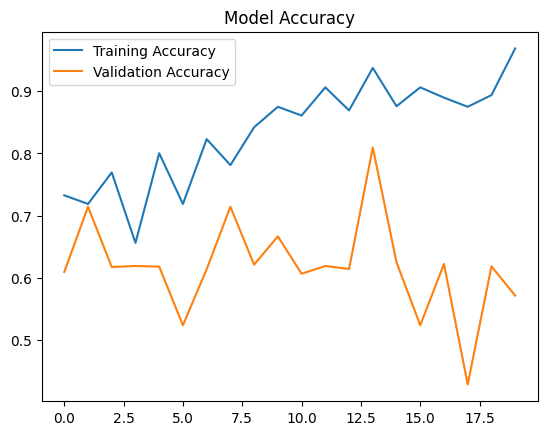

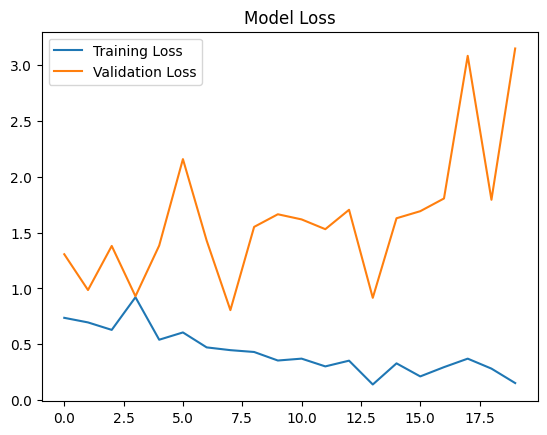

In [59]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'recaptcha-2/test/sample_class/sample_image.jpg'